In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

In [3]:
!pwd

/d/ML/tensorflow-deep-learning/practices


In [4]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [5]:
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
    '''
    Take a random image in target directory
    Arguments:
    target_dir --- the directory into image
    target_class --- the class name of image
    Returns:
    img --- the image in numpy array uint8
    '''
    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    # Show the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape: {img.shape}') # show the shape of the image
    return img

Image shape: (289, 512, 3)


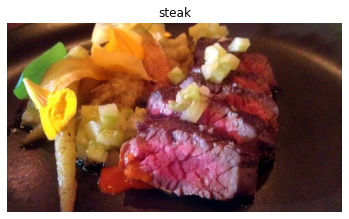

In [6]:
img = view_random_image(target_dir = './pizza_steak/train/', target_class = 'steak')

### TinyVGG (convolutional neural network)

In [7]:
dir(tf.keras.preprocessing)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'image',
 'image_dataset_from_directory',
 'sequence',
 'text',
 'text_dataset_from_directory',
 'timeseries_dataset_from_array']

In [8]:
dir(tf.keras.preprocessing.image)

['DirectoryIterator',
 'ImageDataGenerator',
 'Iterator',
 'NumpyArrayIterator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'apply_affine_transform',
 'apply_brightness_shift',
 'apply_channel_shift',
 'array_to_img',
 'img_to_array',
 'load_img',
 'random_brightness',
 'random_channel_shift',
 'random_rotation',
 'random_shear',
 'random_shift',
 'random_zoom',
 'save_img',
 'smart_resize']

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# preprocess data (get all data in train and test set, normalization it)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the train an test directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size = 32, # number of image to process at a time
                                              target_size = (224,224),
                                              class_mode = 'binary', # type of problem we are working on
                                              seed =42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
train_data.image_shape

(224, 224, 3)

In [11]:
len(train_data)

47

In [12]:
46*32 + 28

1500

In [13]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Create a CNN model
model_1 =  tf.keras.Sequential([
    # Block1-Conv1
    tf.keras.layers.Conv2D(filters = 10,
                        kernel_size = (3,3), # can be also 3
                        activation = 'relu',
                        input_shape = train_data.image_shape),
    # BLock1-Conv2
    tf.keras.layers.Conv2D(filters = 10,
                        kernel_size = (3,3),
                        activation = 'relu',
                        ),
    # BLock1-Maxpool2D
    tf.keras.layers.MaxPool2D(pool_size = (2,2), # can be also 2
                              padding = 'valid' # meaning 0
                             ),
    # Block2-Conv1
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                           activation = 'relu'
                          ),
    # BLock2-Conv2
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation = 'relu'
                          ),
    # BLock2-Maxpool2D
    tf.keras.layers.MaxPool2D(pool_size = (2,2),
                             padding = 'valid'
                             ),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # Output binary decision
    tf.keras.layers.Dense(1,activation ='sigmoid') # binary activation output
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )

history = model_1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = valid_data,
           validation_steps = len(valid_data)
           )

Epoch 1/5
47/47 [==============================] - 117s 2s/step - loss: 0.5835 - accuracy: 0.6873 - val_loss: 0.4319 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 118s 3s/step - loss: 0.4276 - accuracy: 0.7973 - val_loss: 0.3463 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 116s 2s/step - loss: 0.3857 - accuracy: 0.8200 - val_loss: 0.4118 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 116s 2s/step - loss: 0.3592 - accuracy: 0.8467 - val_loss: 0.3042 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 116s 2s/step - loss: 0.3207 - accuracy: 0.8687 - val_loss: 0.3327 - val_accuracy: 0.8540


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

<AxesSubplot:title={'center':'loss curve'}>

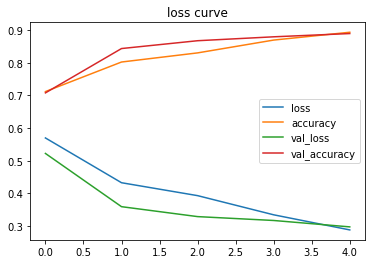

In [17]:
pd.DataFrame(history.history).plot(title = 'loss curve')

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create model to replicate the tensorflow playground model
model_2  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data.image_shape),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),
])

# Compile the model
model_2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history = model_2.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = valid_data,
           validation_steps= len(valid_data)
           )

Epoch 1/5
47/47 [==============================] - 15s 302ms/step - loss: 1.9990 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 14s 290ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 16s 336ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 265ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 261ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


<AxesSubplot:title={'center':'loss curve'}>

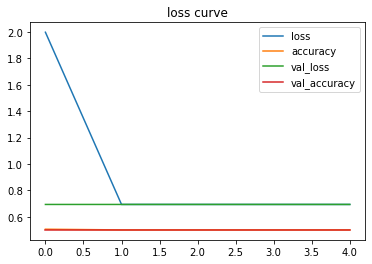

In [19]:
pd.DataFrame(history.history).plot(title = 'loss curve')

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
(224*224*3+1)*4

602116

Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> 🔑 **Note:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers? 

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

> 🔑 **Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [22]:
# Set the random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden layer untils in each layer
model_3  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)), # dense layers expect a 1 dimensional vector as input
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model
model_3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )

# Fit the model
history_3 = model_3.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = valid_data,
           validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 380ms/step - loss: 2.7510 - accuracy: 0.6247 - val_loss: 1.8163 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 18s 379ms/step - loss: 0.9963 - accuracy: 0.6847 - val_loss: 0.5087 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 18s 385ms/step - loss: 0.8465 - accuracy: 0.7040 - val_loss: 0.6337 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 18s 385ms/step - loss: 0.5343 - accuracy: 0.7587 - val_loss: 0.4679 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 18s 374ms/step - loss: 0.6648 - accuracy: 0.7473 - val_loss: 0.5345 - val_accuracy: 0.7660


<AxesSubplot:title={'center':'history 3'}>

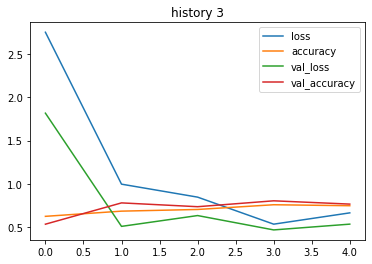

In [23]:
pd.DataFrame(history_3.history).plot(title = 'history 3')

Look like model 3 get overfitting, th loss in train data set descrease but you still get the poor accuracy in valid data

### Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (`visualize, visualize, visualize`)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust the different parameters and improve model (try to beat your self)
7. Repeat until satisfied


### 1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

> 📖 **Resource:** To see how this data was processed into the file format we're using, see the [preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

If the visualization cell below doesn't work, make sure you've got the data by uncommenting the cell below.

Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


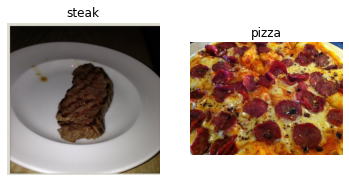

In [24]:
# visualize data (requires function 'view_random_image',above)
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

### 2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into `train` and `test` directories with subfolders in each for each class.

To start we define the training and test directory paths.

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20). 

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the `rescale` parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

> 🔑 **Note:** For more transformation options such as data augmentation (we'll see this later), refer to the [`ImageDataGenerator` documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method.

In [25]:
# Define training and test directory paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [26]:
# import the ImageDataGenerator to create train and test dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [28]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              target_size =(224,224), # define the input size (height,width)
                                              class_mode = 'binary', # defines our classification problem type, use `categorial` for multi-class 
                                              batch_size = 32 # define how many image will be in each batch, default = 32
                                              )
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224,224),
                                            class_mode = 'binary',
                                            batch_size =32
                                            )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
train_data.image_shape

(224, 224, 3)

In [30]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
# Get a sample of train data batch
images,labels = train_data.next() # get the next batch of image/labels
len(images),len(labels)

(32, 32)

In [32]:
# Let see what the input look like
print(images.shape)
print(labels)

(32, 224, 224, 3)
[1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1.]


In [33]:
print(images[0].shape)
images[0]

(224, 224, 3)


array([[[0.47058827, 0.40784317, 0.34509805],
        [0.4784314 , 0.427451  , 0.3647059 ],
        [0.48627454, 0.43529415, 0.37254903],
        ...,
        [0.8313726 , 0.70980394, 0.48627454],
        [0.8431373 , 0.73333335, 0.5372549 ],
        [0.87843144, 0.7725491 , 0.5882353 ]],

       [[0.50980395, 0.427451  , 0.36078432],
        [0.5058824 , 0.42352945, 0.35686275],
        [0.5137255 , 0.4431373 , 0.3647059 ],
        ...,
        [0.82745105, 0.7058824 , 0.48235297],
        [0.82745105, 0.70980394, 0.5058824 ],
        [0.8431373 , 0.73333335, 0.5372549 ]],

       [[0.5254902 , 0.427451  , 0.34901962],
        [0.5372549 , 0.43921572, 0.36078432],
        [0.5372549 , 0.45098042, 0.36078432],
        ...,
        [0.82745105, 0.7019608 , 0.4784314 ],
        [0.82745105, 0.7058824 , 0.49411768],
        [0.8352942 , 0.7176471 , 0.5137255 ]],

       ...,

       [[0.77647066, 0.5647059 , 0.2901961 ],
        [0.7803922 , 0.53333336, 0.22352943],
        [0.79215693, 0

### 3. Create a model (start with a baseline)

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> 🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model_1` from above) and build a 3 layer convolutional neural network.

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

> 📖 **Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  * For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).

Now our model is ready, let's compile it.

Since we're working on a binary classification problem (pizza vs. steak), the `loss` function we're using is `'binary_crossentropy'`, if it was mult-iclass, we might use something like `'categorical_crossentropy'`.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

In [34]:
# Make the creating of out model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense,Activation
from tensorflow.keras import Sequential

In [35]:
# Create the model (this can be our baseline, a 3 hidden layer Convolutional Neural Network)
model_4 = Sequential([
    Conv2D(filters = 10, # the input layer
          kernel_size = (3,3),
          strides = 1,
          padding ='valid', # meaning padding = 0)
          activation = 'relu',
           input_shape = train_data.image_shape # input layer (specify input shape)
          ),
    Conv2D(filters =10,
          kernel_size = (3,3),
          activation = 'relu'
          ),
    Conv2D(filters = 10,
          kernel_size = (3,3),
          activation = 'relu'
          ),
    Flatten(),
    Dense(1,activation = 'sigmoid') # the output layer
])

In [36]:
# Compile the model
model_4.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy']
               )

### 4. Fit a model

Our model is compiled, time to fit it.

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [37]:
# Check leghths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                       )

Epoch 1/5
47/47 [==============================] - 129s 3s/step - loss: 1.4007 - accuracy: 0.6453 - val_loss: 0.4376 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 125s 3s/step - loss: 0.4445 - accuracy: 0.8113 - val_loss: 0.4829 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 133s 3s/step - loss: 0.3623 - accuracy: 0.8427 - val_loss: 0.3773 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 127s 3s/step - loss: 0.2031 - accuracy: 0.9287 - val_loss: 0.4569 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 132s 3s/step - loss: 0.0906 - accuracy: 0.9760 - val_loss: 0.5205 - val_accuracy: 0.7900


### 5. Evaluate the model

Oh yeah! Looks like our model is learning something.

Let's check out its training curves.

<AxesSubplot:>

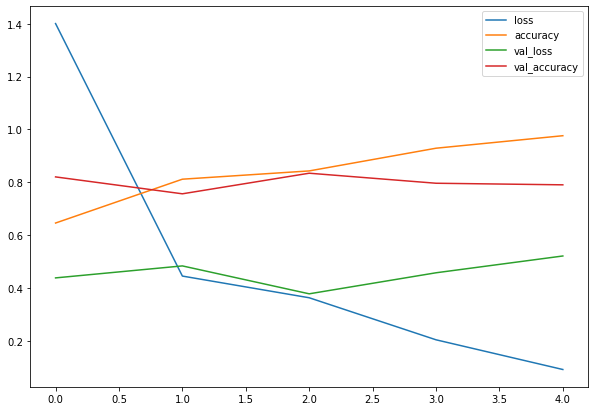

In [39]:
# plot the training curves
pd.DataFrame(history_4.history).plot(figsize = (10,7))

Hmm, judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [14]:
# Plot the validation and training data seperately
def plot_loss_curves(history):
    '''
    Plot seperate loss curves for training and validation metrics
    '''
    # Get the log values in dictionary history
    loss = history.history['loss'] # loss curve in train dataset 
    val_loss = history.history['val_loss'] # loss curve in test dataset
    accuracy = history.history['accuracy'] # accuracy model predicted in train dataset
    val_accuracy = history.history['val_accuracy'] # accuracy model predicted in valid dataset
    epochs = range(len(history.history['loss'])) # Turn the epochs into arange 
    # Plot loss
    plt.plot(epochs,loss,label = 'training_loss')
    plt.plot(epochs,val_loss,label = 'val_loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.legend()
    # Plot the accuracy
    plt.figure() # Create new plot
    plt.plot(epochs,accuracy,label= 'accuracy')
    plt.plot(epochs,val_accuracy,label = 'val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

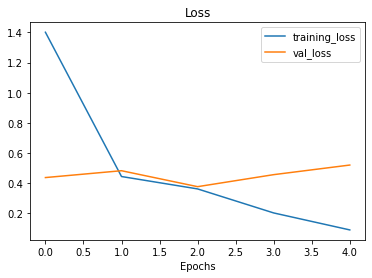

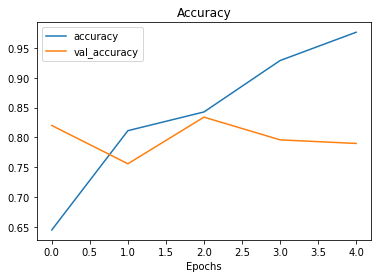

In [47]:
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [48]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:


`Input -> Conv layers + ReLU activation (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output`


Let's built it. It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [3]:
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
    '''
    Take a random image in target directory
    Arguments:
    target_dir --- the directory into image
    target_class --- the class name of image
    Returns:
    img --- the image in numpy array uint8
    '''
    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    # Show the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape: {img.shape}') # show the shape of the image
    return img

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# preprocess data (get all data in train and test set, normalization it)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the train an test directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size = 32, # number of image to process at a time
                                              target_size = (224,224),
                                              class_mode = 'binary', # type of problem we are working on
                                              seed =42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Plot the validation and training data seperately
def plot_loss_curves(history):
    '''
    Plot seperate loss curves for training and validation metrics
    '''
    # Get the log values in dictionary history
    loss = history.history['loss'] # loss curve in train dataset 
    val_loss = history.history['val_loss'] # loss curve in test dataset
    accuracy = history.history['accuracy'] # accuracy model predicted in train dataset
    val_accuracy = history.history['val_accuracy'] # accuracy model predicted in valid dataset
    epochs = range(len(history.history['loss'])) # Turn the epochs into arange 
    # Plot loss
    plt.plot(epochs,loss,label = 'training_loss')
    plt.plot(epochs,val_loss,label = 'val_loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.legend()
    # Plot the accuracy
    plt.figure() # Create new plot
    plt.plot(epochs,accuracy,label= 'accuracy')
    plt.plot(epochs,val_accuracy,label = 'val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [16]:
# Set the random seed
tf.random.set_seed(42)

# Create a CNN model
model_5 =  tf.keras.Sequential([
    # Block1-Conv1
    tf.keras.layers.Conv2D(filters = 32,
                        kernel_size = (3,3), # can be also 3
                        activation = 'relu',
                        padding = 'same',
                        input_shape = train_data.image_shape),
    # BLock1-Conv2
    tf.keras.layers.Conv2D(filters = 32,
                        kernel_size = (3,3),
                        activation = 'relu',
                        padding ='same'
                        ),
    # BLock1-Maxpool2D
    tf.keras.layers.MaxPool2D(pool_size = (2,2), # can be also 2
                              padding = 'valid' # meaning 0
                             ),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # Output binary decision
    tf.keras.layers.Dense(1,activation ='sigmoid') # binary activation output
])

# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )

history_5 = model_1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = valid_data,
           validation_steps = len(valid_data)
           )

Epoch 1/5
47/47 [==============================] - 116s 2s/step - loss: 0.2848 - accuracy: 0.8867 - val_loss: 0.3006 - val_accuracy: 0.8760
Epoch 2/5
47/47 [==============================] - 116s 2s/step - loss: 0.2250 - accuracy: 0.9167 - val_loss: 0.3068 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 123s 3s/step - loss: 0.1988 - accuracy: 0.9213 - val_loss: 0.3536 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 123s 3s/step - loss: 0.1290 - accuracy: 0.9520 - val_loss: 0.3433 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 116s 2s/step - loss: 0.0754 - accuracy: 0.9733 - val_loss: 0.4385 - val_accuracy: 0.8640


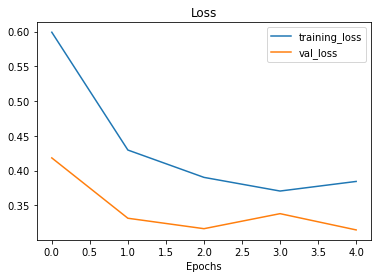

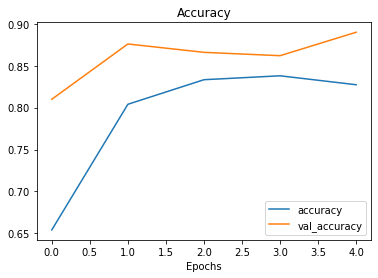

In [31]:
plot_loss_curves(history_5)

In [32]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)             

In [29]:
# Reduce the overfitting
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation = 'relu',
                          input_shape = train_data.image_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation = 'relu',
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation = 'relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
history_5 = model_5.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = valid_data,
           validation_steps = len(valid_data)
           )

Epoch 1/5
47/47 [==============================] - 53s 1s/step - loss: 0.5991 - accuracy: 0.6540 - val_loss: 0.4183 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 55s 1s/step - loss: 0.4296 - accuracy: 0.8040 - val_loss: 0.3315 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 56s 1s/step - loss: 0.3903 - accuracy: 0.8333 - val_loss: 0.3165 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.3706 - accuracy: 0.8380 - val_loss: 0.3381 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 58s 1s/step - loss: 0.3844 - accuracy: 0.8273 - val_loss: 0.3147 - val_accuracy: 0.8900


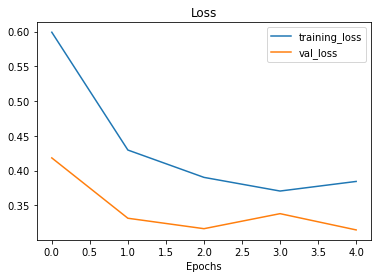

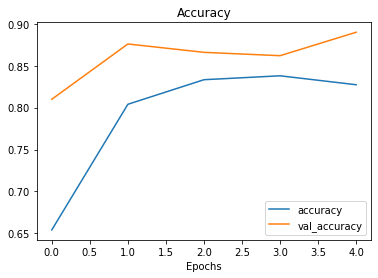

In [33]:
plot_loss_curves(history_5)

In [34]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)             

Woah, we've got another layer type we haven't seen before.

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the *most important* of those features. We'll see this an example of this in a moment.

Do you notice what's going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

Time to check out the loss curves.

###  Data augmentation

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instances.

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

> 🤔 **Question:** Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as `model_5`.

In [36]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 20, # rotate the image slightly between 0, 20 degrees (this is int not float array)
                                             shear_range = 0.2, # shear the image
                                             zoom_range = 0.2, # zoom into the image
                                             width_shift_range = 0.2, # shift the image width ways
                                             height_shift_range = 0.2, # shift the image height ways
                                             horizontal_flip = True # flip the image the horizontal axis
                                            )

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale =1./255)

# Create ImageDataGenerator test instance without data augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
# Import data and augment it from training directory
print("Augmented training images")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = 'binary',
                                                                  shuffle = False # Don't shuffle for demonstration purposes, usually a good thing to shuffle
                                                                  )
# Create non-augemented data batches
print('Non-augemented training images')
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              shuffle = False
                                              )
print("Unchanged test images:")
test_data = valid_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'binary'
                                            )

Augmented training images
Found 1500 images belonging to 2 classes.
Non-augemented training images
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Better than talk about data augmentation, how about we see it?

(remember our motto? visualize, visualize, visualize...)

In [42]:
# Get data batch samples
images,labels = train_data.next() # take the first batch
augmented_images,augmented_labels = train_data_augmented.next() # Note the labels are not augmented, they stay

Text(0.5, 1.0, 'Augmented image')

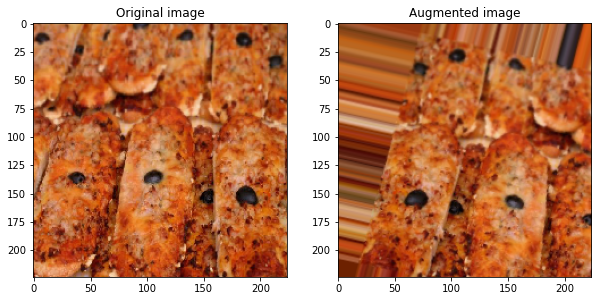

In [53]:
# SHow the augmented and original data size by size
random_number = random.randint(0,32) # We are making batches of size 32, so we'll get a random instance
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title('Original image')
#plt.figure()
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number]) # you don't shuffle meaning the augmented images and no augmented images will correcsponding
plt.title('Augmented image')

In [57]:
# Create  the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape = train_data.image_shape,
                          filters = 10,
                          kernel_size = (3,3),
                          activation ='relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation ='relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation ='relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [58]:
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )

In [60]:
# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                       epochs = 5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = valid_data,
                       validation_steps = len(valid_data)
                       )

Epoch 1/5
47/47 [==============================] - 65s 1s/step - loss: 0.7256 - accuracy: 0.4753 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.6942 - accuracy: 0.4807 - val_loss: 0.6916 - val_accuracy: 0.5740
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.6952 - accuracy: 0.4940 - val_loss: 0.6902 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 66s 1s/step - loss: 0.6925 - accuracy: 0.5240 - val_loss: 0.6900 - val_accuracy: 0.6100
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.6928 - accuracy: 0.5153 - val_loss: 0.6918 - val_accuracy: 0.5720


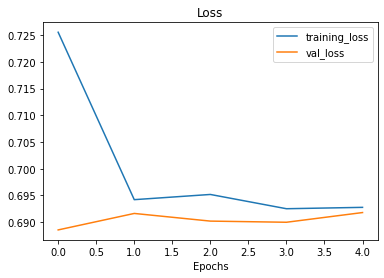

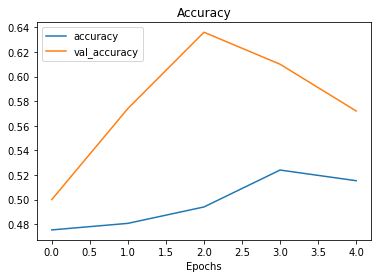

In [62]:
plot_loss_curves(history_6)

> 🤔 **Question:** Why didn't our model get very good results on the training set to begin with?

It's because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time. 

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set `shuffle=False` for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting `shuffle=True` on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the `ImageDataGenerator` instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

> 🔑 **Note:** One possible method to speed up dataset manipulation would be to look into [TensorFlow's parrallel reads and buffered prefecting options](https://www.tensorflow.org/tutorials/images/data_augmentation).

It seems our validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale).

Let's see what happens when we shuffle the augmented training data.

In [63]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size = (224,224),
                                                                           batch_size= 32,
                                                                           class_mode = 'binary',
                                                                           shuffle = True # Shuffle data
                                                                           )

Found 1500 images belonging to 2 classes.


In [64]:
# Create the model a fit with shuffled data

# Create  the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape = train_data.image_shape,
                          filters = 10,
                          kernel_size = (3,3),
                          activation ='relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation ='relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation ='relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [65]:
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )

In [66]:
# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled, # changed to augmented training data
                       epochs = 5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = valid_data,
                       validation_steps = len(valid_data)
                       )

Epoch 1/5
47/47 [==============================] - 66s 1s/step - loss: 0.6311 - accuracy: 0.6313 - val_loss: 0.5277 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.5662 - accuracy: 0.7133 - val_loss: 0.4399 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 77s 2s/step - loss: 0.4885 - accuracy: 0.7713 - val_loss: 0.4087 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 71s 2s/step - loss: 0.4913 - accuracy: 0.7653 - val_loss: 0.3631 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.4901 - accuracy: 0.7767 - val_loss: 0.3852 - val_accuracy: 0.8260


In [67]:
model_6.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6760)             

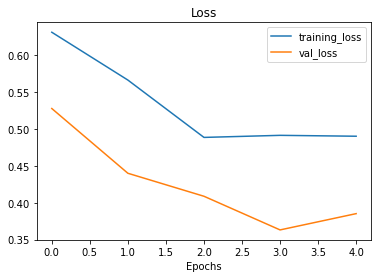

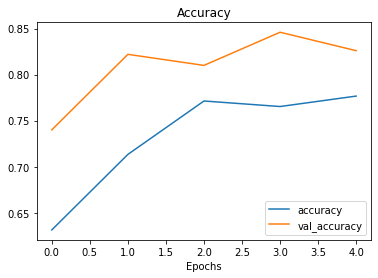

In [68]:
plot_loss_curves(history_6)

Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing `history_6` to `history_7`).

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (`model_1` or the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/)).


In [70]:
model_7  = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape = train_data.image_shape,
                          filters = 10,
                          kernel_size= (3,3),
                          activation = 'relu'
                          ),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation = 'relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation = 'relu'
                          ),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = (3,3),
                          activation = 'relu'
                          ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [73]:
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )

In [74]:
history_7 = model_7.fit(train_data_augmented_shuffled,
                       epochs = 5,
                       steps_per_epoch = len(train_data_augmented_shuffled),
                       validation_data = valid_data,
                       validation_steps = len(valid_data)
                       )

Epoch 1/5
47/47 [==============================] - 110s 2s/step - loss: 0.6428 - accuracy: 0.6027 - val_loss: 0.4103 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 126s 3s/step - loss: 0.5323 - accuracy: 0.7407 - val_loss: 0.4636 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 116s 2s/step - loss: 0.4747 - accuracy: 0.7867 - val_loss: 0.3700 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 117s 2s/step - loss: 0.4535 - accuracy: 0.7980 - val_loss: 0.3234 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 123s 3s/step - loss: 0.4619 - accuracy: 0.7940 - val_loss: 0.3476 - val_accuracy: 0.8380


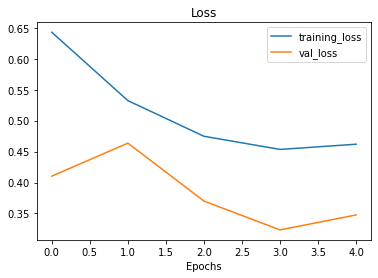

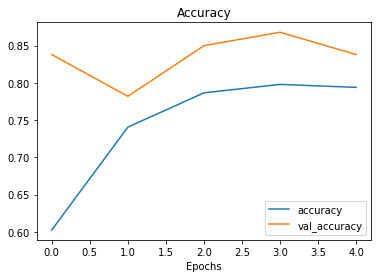

In [75]:
# Check the performance of tinyVGG
plot_loss_curves(history_7)

Hmm, our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

Perhaps that's something you like to try?

### Making a prediction with our trained model

What good is a trained model if you can't make predictions with it?

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.

In [77]:
# Classes we are working with
print(class_names)

['pizza' 'steak']


(4032, 3024, 3)


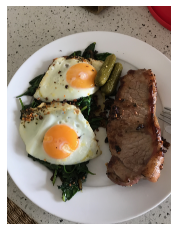

In [81]:
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)
print(steak.shape)

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for readining files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing our image and turning it into a tensor).

> 🔑 **Note:** For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [82]:
# Create a function to import an image and resize it to be able to used with our model
def load_and_prep_image(filename, img_shape = 224):
    '''
    Reads an image from filename, turns it into a  tensor, and reshape it into (img_shape,img_shape,color_channel)
    Arguments:
    filenames --- the file's path
    img_shape --- the shape of image
    Return:
    img --- the preprocessed image
    '''
    # Read in target file (an image)
    img = tf.io.read_file(filename)
    
    # Decode the read file into tensor & ensure 3 color channels
    # our model is trained on images with 3 color channels and sometimes images have 3 color channels
    img = tf.image.decode_image(img,channels = 3)
    
    # Resize the image (to the same size we was trained on)
    img = tf.image.resize(img,size = [img_shape,img_shape])
    
    # Normalize image 
    img = img/255
    
    return img

Text(0.5, 1.0, 'preprocessed image')

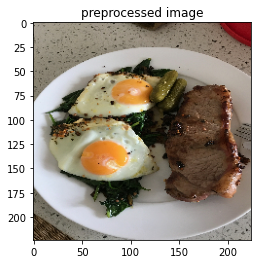

In [84]:
# Load and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
plt.imshow(steak)
plt.title('preprocessed image')

In [85]:
model_7.predict(tf.expand_dims(steak,axis = 0))

array([[0.7026319]], dtype=float32)

In [97]:
pred_output = model_7.predict(tf.expand_dims(steak,axis = 0))
pred_output = tf.round(pred_output)
pred_output = tf.squeeze(pred_output)
pred_output = int(pred_output.numpy())
pred_class = class_names[pred_output]
pred_class

'steak'

In [98]:
def pred_and_plot(model,filename,class_names):
    '''
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    Arguments:
    model --- your model
    filename --- the path of image
    class_names --- all labels list
    Return:
    plot image and predicted label
    '''
    # Preprocess image
    img = load_and_prep_image(filename, img_shape = 224)
    # predict the label
    pred_output = model.predict(tf.expand_dims(img,axis = 0))
    pred_output = tf.round(pred_output)
    pred_output = tf.squeeze(pred_output)
    pred_output = int(pred_output.numpy())
    pred_class = class_names[pred_output]
    plt.imshow(img)
    plt.title(pred_class)

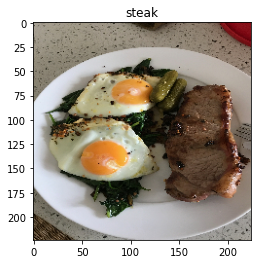

In [99]:
pred_and_plot(model_7,'03-steak.jpeg',class_names)

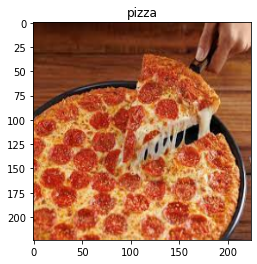

In [101]:
pred_and_plot(model_7,'pizza.jpg',class_names)

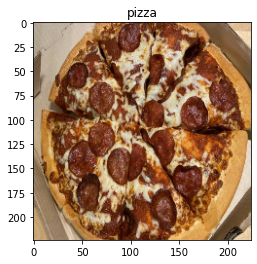

In [102]:
pred_and_plot(model_7,'pizza2.jpg',class_names)

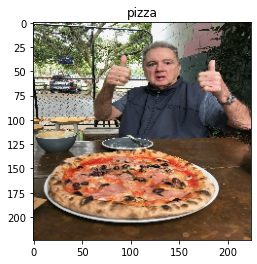

In [103]:
pred_and_plot(model_7,'03-pizza.jpeg',class_names)

In [104]:
# Save your model
model_7.save('model_pizza_steak')

INFO:tensorflow:Assets written to: model_pizza_steak\assets
